In [2]:
from pathlib import Path

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import v2 as transforms
from torch.utils.data import DataLoader, random_split

from utils import suffixDataset

In [3]:
batch_size = 4
transformer = {"img": transforms.Compose([transforms.ToImage(),
                                          transforms.ToDtype(torch.uint8, scale=True), 
                                          transforms.Resize((256,256)),
                                          transforms.ToDtype(torch.float32, scale=True),
                                        #   transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                          ]),
                "mask": transforms.Compose([transforms.ToImage(),
                                            transforms.ToDtype(torch.uint8), 
                                            transforms.Resize((256,256), interpolation=0),
                                            transforms.ToDtype(torch.long),
                                            ]),              
                }
dataset = suffixDataset(Path(r"./data/Dataset_BUSI_with_GT/processed"), transformer, [".png", "_mask.png"])
# dataset = suffixDataset(Path(r"./data/kaggle_3m"), transformer, [".tif", "_mask.tif"])
train_size = int(0.8 * len(dataset))
train_dataset, valid_dataset = random_split(dataset, [train_size, len(dataset) - train_size])

dl_train = DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
dl_valid = DataLoader(valid_dataset, batch_size = batch_size, shuffle = False)

(256, 256) [0 2]
(256, 256) [0 1]
(256, 256) [0 2]
(256, 256) [0]


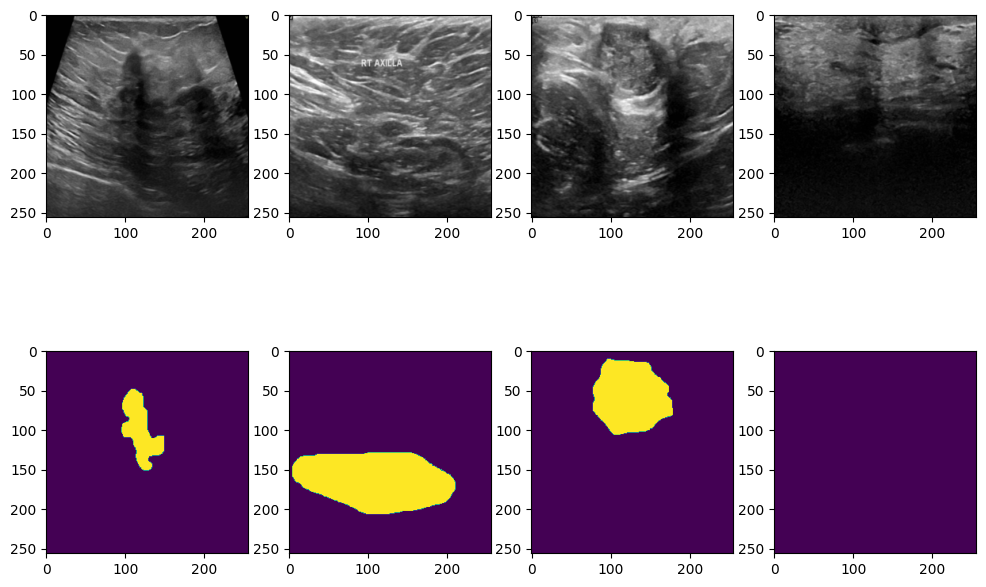

In [4]:
img, label=next(iter(dl_train))
plt.figure(figsize=(12,8))
for i,(img, label) in enumerate(zip(img,label)):
    img = img.permute(1,2,0).numpy()
    label = label.numpy()
    print(label.shape, np.unique(label))
    plt.subplot(2,4,i+1)
    plt.imshow(img)
    plt.subplot(2,4,i+batch_size+1)
    plt.imshow(label)